In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
zip_file = '/content/drive/MyDrive/Майнор ИАД/2022Лаб4ИАД/RS_anime.zip'

In [ ]:
z = zipfile.ZipFile(zip_file, 'r')
z.extractall()

In [ ]:
anime_df = pd.read_csv('/content/anime.csv')
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [ ]:
rating_df = pd.read_csv('/content/rating.csv')
rating_df.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [ ]:
print(anime_df.shape)
print(rating_df.shape)

(12294, 7)
(7813737, 3)


В colab не хватает памяти для работы со всем набором данных. Возьмем его часть

In [ ]:
print('Количество уникальных значений anime_id в rating_df -', len(rating_df.groupby('anime_id').size()))
print('Количество уникальных значений anime_id в anime_df -', len(anime_df.groupby('anime_id').size()))

Количество уникальных значений anime_id в rating_df - 11200
Количество уникальных значений anime_id в anime_df - 12294


Обрежем rating_df и оставим в anime_df те anime_id, которые есть в обоих наборах данных

In [ ]:
rating_df = rating_df.loc[:rating_df.shape[0]//10]

In [ ]:
print('Количество уникальных значений anime_id в rating_df -', len(rating_df.groupby('anime_id').size()))
print('Количество уникальных значений anime_id в anime_df -', len(anime_df.groupby('anime_id').size()))

Количество уникальных значений anime_id в rating_df - 8016
Количество уникальных значений anime_id в anime_df - 12294


In [ ]:
anime_df = pd.DataFrame(anime_df.loc[anime_df['anime_id'].isin(pd.unique(rating_df['anime_id'])) == True])
anime_df = anime_df.set_index(pd.Series(range(0, len(rating_df.groupby('anime_id').size()))))
anime_df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
8011,6903,Prima Donna Mai,Hentai,OVA,1,4.53,442
8012,5589,Offside Girl,"Hentai, Sports",OVA,2,4.30,945
8013,4310,Joshidai: Ecchi Soudanshitsu,Hentai,OVA,1,3.70,779
8014,5569,Tsui no Sora,Hentai,OVA,1,2.98,934


In [ ]:
print('Количество уникальных значений anime_id в rating_df -', len(rating_df.groupby('anime_id').size()))
print('Количество уникальных значений anime_id в anime_df -', len(anime_df.groupby('anime_id').size()))

Количество уникальных значений anime_id в rating_df - 8016
Количество уникальных значений anime_id в anime_df - 8016


In [ ]:
print(anime_df.shape)
print(rating_df.shape)

(8016, 7)
(781374, 3)


### Задание №1 : Exploratory analysis (2 балла):

* Распределение числа пользователей по количеству взаимодействий
* Раcпределение числа "айтемов" по количеству взаимодействий
* Распределение числа рейтингов, средних рейтингов по пользователям, по "айтемам"
* и т.д. (бонус)

#### Распределение числа пользователей по количеству взаимодействий

In [ ]:
rating_df.groupby('user_id').size().describe()

count    7253.000000
mean      107.731146
std       143.040928
min         1.000000
25%        19.000000
50%        60.000000
75%       138.000000
max      1584.000000
dtype: float64

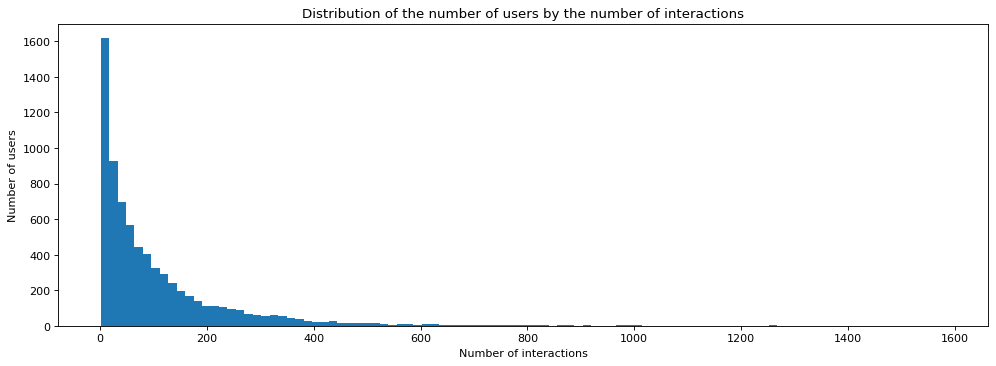

In [ ]:
plt.figure(figsize=(15, 5), dpi=80)
plt.title('Distribution of the number of users by the number of interactions')
plt.xlabel('Number of interactions')
plt.ylabel('Number of users')
plt.hist(rating_df.groupby('user_id').size().values, bins=100)
plt.show()

Основная часть пользователей мало смотрит аниме, однако данная статистика не учитывает количество эпизодов в аниме. <br>25% всех пользователей смотрели менее 19 аниме. <br>75% - менее 138.

#### Распределение аниме по количеству эпизодов

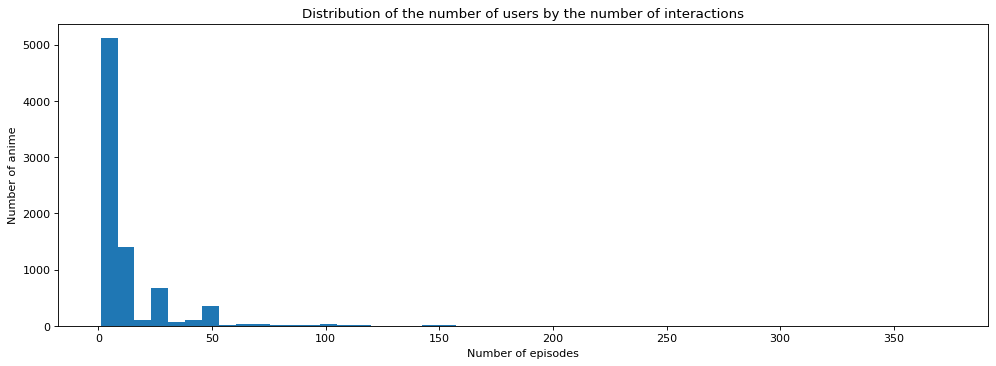

In [ ]:
plt.figure(figsize=(15, 5), dpi=80)
plt.title('Distribution of the number of users by the number of interactions')
plt.xlabel('Number of episodes')
plt.ylabel('Number of anime')
plt.hist(pd.to_numeric(anime_df.loc[pd.to_numeric(anime_df['episodes']) < 500]['episodes']), bins=50)
plt.show()

In [ ]:
anime_df.groupby('episodes').size().describe()

count     157.000000
mean       51.057325
std       276.592180
min         1.000000
25%         1.000000
50%         2.000000
75%         8.000000
max      3226.000000
dtype: float64

Большая часть аниме обладает небольшим количеством эпизодов, в 75% случаев - менее 8.

#### Распределение числа аниме по количеству взаимодействий

In [ ]:
rating_df.groupby('anime_id').size() # количество встреч anime_id в rating_df

anime_id
1        1641
5         751
6        1129
7         254
8          43
         ... 
34173       1
34240     146
34283       4
34324       2
34325       1
Length: 8016, dtype: int64

In [ ]:
rating_df.groupby('anime_id').size().describe()

count    8016.000000
mean       97.476796
std       236.782126
min         1.000000
25%         3.000000
50%        14.000000
75%        77.000000
max      3951.000000
dtype: float64

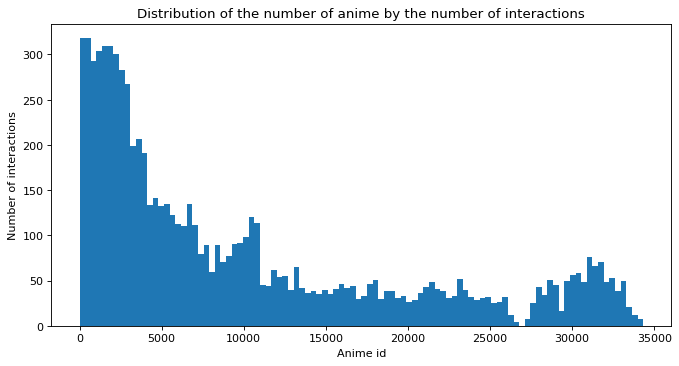

In [ ]:
plt.figure(figsize=(10, 5), dpi=80)
plt.title('Distribution of the number of anime by the number of interactions')
plt.xlabel('Anime id')
plt.ylabel('Number of interactions')
plt.hist(rating_df.groupby('anime_id').size().index, bins=100)
plt.show()

Аниме с индексам меньше обладают большим числом взаимодействий. Если индекс аниме это порядковый номер, который присваивается аниме при выходе на площадку, то больше взаимодействий имеют те аниме, которые дольше остальных находятся на площадке

#### Распределение числа рейтингов, средних рейтингов по пользователям, по "айтемам"

In [ ]:
rating_df.groupby('rating').size()

rating
-1     143763
 1       1604
 2       2512
 3       4236
 4      10490
 5      28049
 6      64602
 7     139708
 8     165987
 9     127919
 10     92504
dtype: int64

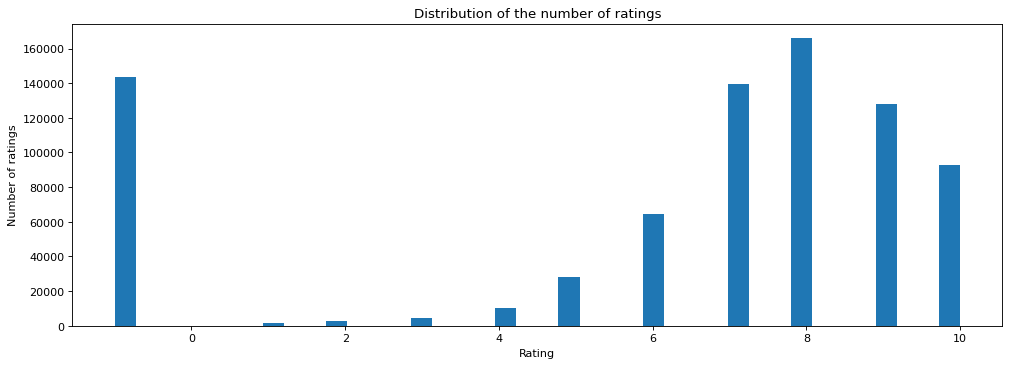

In [ ]:
plt.figure(figsize=(15, 5), dpi=80)
plt.ticklabel_format(style='plain', axis='both', scilimits=(0,0))
plt.title('Distribution of the number of ratings')
plt.xlabel('Rating')
plt.ylabel('Number of ratings')
plt.hist(rating_df['rating'], bins=40)
plt.show()

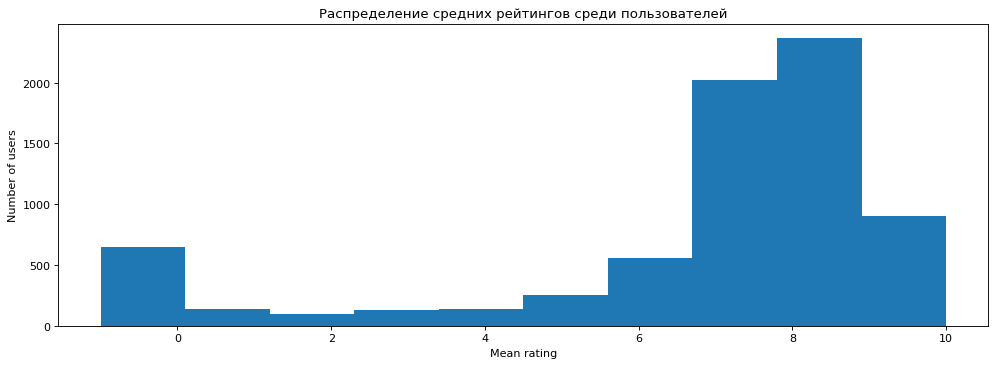

In [ ]:
plt.figure(figsize=(15, 5), dpi=80)
plt.ticklabel_format(style='plain', axis='both', scilimits=(0,0))
plt.title('Распределение средних рейтингов среди пользователей')
plt.xlabel('Mean rating')
plt.ylabel('Number of users')
plt.hist(rating_df.groupby('user_id')['rating'].mean())
plt.show()

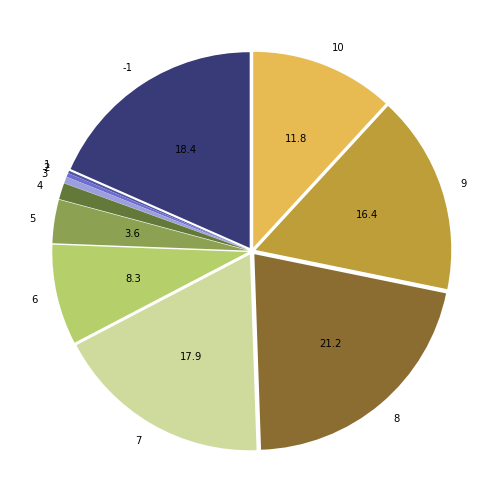

In [ ]:
cm = plt.get_cmap('tab20b')

def my_autopct(pct):
    return ('%1.1f' % pct) if pct > 2 else ''

labels = rating_df.groupby('rating').size().index
sizes = rating_df.groupby('rating').size().values
explode = np.full(11, 0.02)

fig1, ax1 = plt.subplots(figsize=(9, 9))
ax1.pie(sizes, labels=labels, explode = explode, autopct=my_autopct, startangle=90, colors=cm(np.arange(11)))

plt.show()

Значения -1, 7, 8, 9 встречаются примерно равное количество раз. Реже встречаются оценки 6 и 10, еще реже - все остальные. Можно сделать вывод, что набор данных не сбалансирован относительно рейтинга

### Задание №2 : Оценить разреженность данных по рейтингу (1/2 балла)

* Unknown - заполнить значением '6'
* Nan - удалить

#### Anime_df

In [ ]:
anime_df.loc[anime_df['episodes'] == 'Unknown']

,anime_id,name,genre,type,episodes,rating,members


Значения Unknown в обрезанном датасете не обнаружены, чего нельзя сказать о целом наборе данных

In [ ]:
anime_df.describe()

,anime_id,rating,members
count,8016.000000,8016.000000,8.016000e+03
mean,9949.071981,6.800177,2.693453e+04
std,9802.063751,0.846488,6.550009e+04
min,1.000000,2.000000,4.300000e+01
25%,2232.500000,6.310000,1.385000e+03
50%,5964.500000,6.830000,4.412500e+03
75%,15585.000000,7.380000,2.054475e+04
max,34325.000000,9.370000,1.013917e+06


In [ ]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8016 entries, 0 to 8015
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  8016 non-null   int64  
 1   name      8016 non-null   object 
 2   genre     8006 non-null   object 
 3   type      8016 non-null   object 
 4   episodes  8016 non-null   object 
 5   rating    8016 non-null   float64
 6   members   8016 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 759.0+ KB


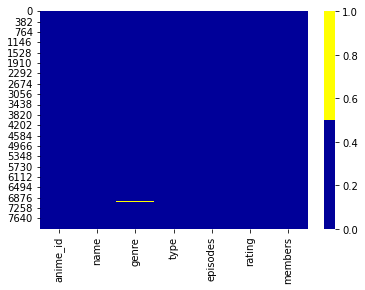

In [ ]:
cols = anime_df.columns # первые 20 колонок
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(anime_df[cols].isnull(), cmap=sns.color_palette(colours))

In [ ]:
for col in anime_df.columns:
    print("{0}, num. NA's: {1}".format(col, pd.isnull(anime_df[col]).sum()))

anime_id, num. NA's: 0
name, num. NA's: 0
genre, num. NA's: 10
type, num. NA's: 0
episodes, num. NA's: 0
rating, num. NA's: 0
members, num. NA's: 0


Удалим обнаруженные значения Nan

In [ ]:
anime_df.dropna(inplace = True)

#### Rating_df

In [ ]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781374 entries, 0 to 781373
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   user_id   781374 non-null  int64
 1   anime_id  781374 non-null  int64
 2   rating    781374 non-null  int64
dtypes: int64(3)
memory usage: 17.9 MB


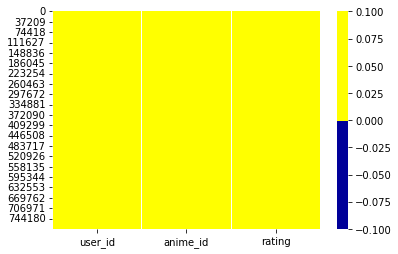

In [ ]:
cols = rating_df.columns # первые 20 колонок
# синий - пропущенные данные, желтый - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(rating_df[cols].isnull(), cmap=sns.color_palette(colours))

In [ ]:
for col in rating_df.columns:
    print("{0}, num. NA's: {1}".format(col, pd.isnull(rating_df[col]).sum()))

user_id, num. NA's: 0
anime_id, num. NA's: 0
rating, num. NA's: 0


Пропущенные значения в rating_df не обнаружены

In [ ]:
print('sparcity of rating matrix',
1-rating_df.shape[0]/(rating_df.anime_id.nunique()*rating_df.user_id.nunique()))

sparcity of rating matrix 0.9865604858117765


Матрица обладает небольшим количеством пропущенных значений

### Задание №3 : Разделить данные на тренировочные и валидационные (1/2 балла)

Разделим данные по user_id

In [ ]:
TRESHOLD = 0.7
MIN_RATE = 10

rating_df_filtered = rating_df.groupby('user_id').filter(lambda x: len(x)>=MIN_RATE)

print('Rating table after min filtering', rating_df_filtered.shape[0])

Rating table after min filtering 776688


In [ ]:
train = pd.DataFrame()
test = pd.DataFrame()

for user in rating_df_filtered.user_id.unique():
    temp_table = rating_df_filtered[rating_df_filtered.user_id == user]
    cnt = temp_table.shape[0]
    size_train = round(cnt*0.7, 0)
    train = train.append(temp_table.iloc[:int(size_train),:])
    test = test.append(temp_table.iloc[int(size_train):,:])

In [ ]:
print('dataset train ', train.shape[0], ' test', test.shape[0])
print('unique user in train', train.user_id.nunique(), 'test ', test.user_id.nunique())
print('cold-user in the test ', test.user_id.nunique() - test[test.user_id.isin(train.user_id)].user_id.nunique())

dataset train  543583  test 233105
unique user in train 6147 test  6147
cold-user in the test  0


In [ ]:
print('unique user in train', train.anime_id.nunique(), 'test ', test.anime_id.nunique())
print('cold-item in the test ', test.anime_id.nunique() - test[test.anime_id.isin(train.anime_id)].anime_id.nunique())

unique user in train 6696 test  6136
cold-item in the test  1318


### Метрики

In [ ]:
"""Information Retrieval metrics
Useful Resources:
http://www.cs.utexas.edu/~mooney/ir-course/slides/Evaluation.ppt
http://www.nii.ac.jp/TechReports/05-014E.pdf
http://www.stanford.edu/class/cs276/handouts/EvaluationNew-handout-6-per.pdf
http://hal.archives-ouvertes.fr/docs/00/72/67/60/PDF/07-busa-fekete.pdf
Learning to Rank for Information Retrieval (Tie-Yan Liu)
"""


def mean_reciprocal_rank(rs):
    """Score is reciprocal of the rank of the first relevant item
    First element is 'rank 1'.  Relevance is binary (nonzero is relevant).
    Example from http://en.wikipedia.org/wiki/Mean_reciprocal_rank
    >>> rs = [[0, 0, 1], [0, 1, 0], [1, 0, 0]]
    >>> mean_reciprocal_rank(rs)
    0.61111111111111105
    >>> rs = np.array([[0, 0, 0], [0, 1, 0], [1, 0, 0]])
    >>> mean_reciprocal_rank(rs)
    0.5
    >>> rs = [[0, 0, 0, 1], [1, 0, 0], [1, 0, 0]]
    >>> mean_reciprocal_rank(rs)
    0.75
    Args:
        rs: Iterator of relevance scores (list or numpy) in rank order
            (first element is the first item)
    Returns:
        Mean reciprocal rank
    """
    rs = (np.asarray(r).nonzero()[0] for r in rs)
    return np.mean([1. / (r[0] + 1) if r.size else 0. for r in rs])


def r_precision(r):
    """Score is precision after all relevant documents have been retrieved
    Relevance is binary (nonzero is relevant).
    >>> r = [0, 0, 1]
    >>> r_precision(r)
    0.33333333333333331
    >>> r = [0, 1, 0]
    >>> r_precision(r)
    0.5
    >>> r = [1, 0, 0]
    >>> r_precision(r)
    1.0
    Args:
        r: Relevance scores (list or numpy) in rank order
            (first element is the first item)
    Returns:
        R Precision
    """
    r = np.asarray(r) != 0
    z = r.nonzero()[0]
    if not z.size:
        return 0.
    return np.mean(r[:z[-1] + 1])


def precision_at_k(r, k):
    """Score is precision @ k
    Relevance is binary (nonzero is relevant).
    >>> r = [0, 0, 1]
    >>> precision_at_k(r, 1)
    0.0
    >>> precision_at_k(r, 2)
    0.0
    >>> precision_at_k(r, 3)
    0.33333333333333331
    >>> precision_at_k(r, 4)
    Traceback (most recent call last):
        File "<stdin>", line 1, in ?
    ValueError: Relevance score length < k
    Args:
        r: Relevance scores (list or numpy) in rank order
            (first element is the first item)
    Returns:
        Precision @ k
    Raises:
        ValueError: len(r) must be >= k
    """
    assert k >= 1
    r = np.asarray(r)[:k] != 0
    if r.size != k:
        raise ValueError('Relevance score length < k')
    return np.mean(r)


def average_precision(r):
    """Score is average precision (area under PR curve)
    Relevance is binary (nonzero is relevant).
    >>> r = [1, 1, 0, 1, 0, 1, 0, 0, 0, 1]
    >>> delta_r = 1. / sum(r)
    >>> sum([sum(r[:x + 1]) / (x + 1.) * delta_r for x, y in enumerate(r) if y])
    0.7833333333333333
    >>> average_precision(r)
    0.78333333333333333
    Args:
        r: Relevance scores (list or numpy) in rank order
            (first element is the first item)
    Returns:
        Average precision
    """
    r = np.asarray(r) != 0
    out = [precision_at_k(r, k + 1) for k in range(r.size) if r[k]]
    if not out:
        return 0.
    return np.mean(out)


def mean_average_precision(rs):
    """Score is mean average precision
    Relevance is binary (nonzero is relevant).
    >>> rs = [[1, 1, 0, 1, 0, 1, 0, 0, 0, 1]]
    >>> mean_average_precision(rs)
    0.78333333333333333
    >>> rs = [[1, 1, 0, 1, 0, 1, 0, 0, 0, 1], [0]]
    >>> mean_average_precision(rs)
    0.39166666666666666
    Args:
        rs: Iterator of relevance scores (list or numpy) in rank order
            (first element is the first item)
    Returns:
        Mean average precision
    """
    return np.mean([average_precision(r) for r in rs])


def dcg_at_k(r, k, method=0):
    """Score is discounted cumulative gain (dcg)
    Relevance is positive real values.  Can use binary
    as the previous methods.
    Example from
    http://www.stanford.edu/class/cs276/handouts/EvaluationNew-handout-6-per.pdf
    >>> r = [3, 2, 3, 0, 0, 1, 2, 2, 3, 0]
    >>> dcg_at_k(r, 1)
    3.0
    >>> dcg_at_k(r, 1, method=1)
    3.0
    >>> dcg_at_k(r, 2)
    5.0
    >>> dcg_at_k(r, 2, method=1)
    4.2618595071429155
    >>> dcg_at_k(r, 10)
    9.6051177391888114
    >>> dcg_at_k(r, 11)
    9.6051177391888114
    Args:
        r: Relevance scores (list or numpy) in rank order
            (first element is the first item)
        k: Number of results to consider
        method: If 0 then weights are [1.0, 1.0, 0.6309, 0.5, 0.4307, ...]
                If 1 then weights are [1.0, 0.6309, 0.5, 0.4307, ...]
    Returns:
        Discounted cumulative gain
    """
    r = np.asfarray(r)[:k]
    if r.size:
        if method == 0:
            return r[0] + np.sum(r[1:] / np.log2(np.arange(2, r.size + 1)))
        elif method == 1:
            return np.sum(r / np.log2(np.arange(2, r.size + 2)))
        else:
            raise ValueError('method must be 0 or 1.')
    return 0.


def ndcg_at_k(r, k, method=0):
    """Score is normalized discounted cumulative gain (ndcg)
    Relevance is positive real values.  Can use binary
    as the previous methods.
    Example from
    http://www.stanford.edu/class/cs276/handouts/EvaluationNew-handout-6-per.pdf
    >>> r = [3, 2, 3, 0, 0, 1, 2, 2, 3, 0]
    >>> ndcg_at_k(r, 1)
    1.0
    >>> r = [2, 1, 2, 0]
    >>> ndcg_at_k(r, 4)
    0.9203032077642922
    >>> ndcg_at_k(r, 4, method=1)
    0.96519546960144276
    >>> ndcg_at_k([0], 1)
    0.0
    >>> ndcg_at_k([1], 2)
    1.0
    Args:
        r: Relevance scores (list or numpy) in rank order
            (first element is the first item)
        k: Number of results to consider
        method: If 0 then weights are [1.0, 1.0, 0.6309, 0.5, 0.4307, ...]
                If 1 then weights are [1.0, 0.6309, 0.5, 0.4307, ...]
    Returns:
        Normalized discounted cumulative gain
    """
    dcg_max = dcg_at_k(sorted(r, reverse=True), k, method)
    if not dcg_max:
        return 0.
    return dcg_at_k(r, k, method) / dcg_max

### Задание №4 : Решить задачу на основе предложения всем юзерам наиболее популярных item (1 балл)

Сохраняем топ 10 самых популярных аниме. Будем рекомендовать их каждому из 6147 пользователей

In [ ]:
predict = []

number_of_anime = 10
top_anime = list(rating_df.groupby('anime_id').size().sort_values(ascending=False)[:number_of_anime].values)

for i in range(len(train.user_id.unique())):
    predict.append(top_anime)
predict = np.array(predict)

In [ ]:
predict[2]

array([3951, 3250, 3206, 2877, 2825, 2658, 2614, 2612, 2576, 2442])

In [ ]:
predict.shape

(6147, 10)

Создаем id2user/user2id для создания соответствия между predict и user_id

In [ ]:
id2user = {key: value for key, value in enumerate(train.user_id.unique())}
user2id  = {value:key for key, value in id2user.items()}
# id2items = {key: value for key, value in enumerate(train.anime_id.unique())} # Get our unique products that were purchased
# items2id  = {value:key for key, value in id2items.items()}
# rating = list(train.rating) # All of our purchases

Находим и помечаем 'холодных' пользователей

In [ ]:
train_users, test_users = set(train.user_id), set(test.user_id)
train_movies, test_movies = set(train.anime_id), set(test.anime_id)
cold_users = [i for i in test_users if i not in train_users]
cold_items = [i for i in test_movies if i not in train_movies]

In [ ]:
# flag cold user
test['cold_users'] = test.user_id.map(lambda x: x in cold_users)
# flag cold item
test['cold_items'] = test.anime_id.map(lambda x: x in cold_items)
test.head()

,user_id,anime_id,rating,cold_users,cold_items
107,1,17265,-1,False,False
108,1,17729,-1,False,False
109,1,18247,-1,False,False
110,1,18277,-1,False,False
111,1,18753,-1,False,False


Сортируем тест аниме по рейтингу для подсчета метрик, делаем group_by по user_id, исключаем холодных пользователей

In [ ]:
test = test.sort_values(by=['user_id', 'rating'], ascending=False)
test_result = test[(test.cold_items==False)&(test.cold_users==False)]
test_result = test_result.groupby(['user_id'])['anime_id'].apply(lambda x: list(x)).reset_index()

Объединяем predict и test_result

In [ ]:
test_result['anime_id_pred'] = test_result.user_id.map(lambda x: predict[user2id[x], :])
# test_result['anime_id_pred'] = test_result.anime_id_pred.map(lambda x: [id2items[i] for i in x])

Рекомендуем

In [ ]:
test_result['top_3'] = test_result.apply(lambda x: [int(pred in x.anime_id_pred[:3]) for pred in x.anime_id[:3]], axis=1)
test_result['top_5'] = test_result.apply(lambda x: [int(pred in x.anime_id_pred[:5]) for pred in x.anime_id[:5]], axis=1)
test_result['top_10'] = test_result.apply(lambda x: [int(pred in x.anime_id_pred[:10]) for pred in x.anime_id[:10]], axis=1)

In [ ]:
test_result.head(10)

,user_id,anime_id,anime_id_pred,top_3,top_5,top_10
0,1,"[17265, 17729, 18247, 18277, 18753, 18897, 191...","[3951, 3250, 3206, 2877, 2825, 2658, 2614, 261...","[0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,3,"[24415, 28171, 31043, 20583, 28121, 28701, 288...","[3951, 3250, 3206, 2877, 2825, 2658, 2614, 261...","[0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,4,"[17265, 17505, 17777, 18115, 18153, 18229, 185...","[3951, 3250, 3206, 2877, 2825, 2658, 2614, 261...","[0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
3,5,"[28891, 32182, 17265, 18689, 19647, 20057, 205...","[3951, 3250, 3206, 2877, 2825, 2658, 2614, 261...","[0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,6,"[10719, 10800, 10897, 11285, 12079, 12893, 140...","[3951, 3250, 3206, 2877, 2825, 2658, 2614, 261...","[0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
5,7,"[23421, 28497, 31043, 22273, 23289, 23383, 237...","[3951, 3250, 3206, 2877, 2825, 2658, 2614, 261...","[0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
6,8,"[11757, 13759, 15583, 11241]","[3951, 3250, 3206, 2877, 2825, 2658, 2614, 261...","[0, 0, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]"
7,11,"[6351, 12355, 16498, 18153, 18679, 22265, 2325...","[3951, 3250, 3206, 2877, 2825, 2658, 2614, 261...","[0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
8,12,"[9253, 16498, 6573, 7338, 8888, 11757, 8074]","[3951, 3250, 3206, 2877, 2825, 2658, 2614, 261...","[0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0]"
9,13,"[12413, 12623, 12883, 12893, 13053, 13331, 134...","[3951, 3250, 3206, 2877, 2825, 2658, 2614, 261...","[0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


Считаем метрики

In [ ]:
score_results = pd.DataFrame(index=['top_3', 'top_5', 'top_10'], columns=['MRR', 'MAP@K', 'NDCG@k'])

In [ ]:
for top in [3, 5, 10]:
    score_results.loc['top_'+str(top), 'MAP@K'] = mean_reciprocal_rank(list(test_result['top_'+str(top)].values))
    score_results.loc['top_'+str(top), 'MRR'] = mean_average_precision(list(test_result['top_'+str(top)].values))
    score_results.loc['top_'+str(top), 'NDCG@k'] = np.mean([ndcg_at_k(i, top) for i in list(test_result['top_'+str(top)].values)])

In [ ]:
score_results

,MRR,MAP@K,NDCG@k
top_3,0.0,0.0,0.0
top_5,0.000127,0.000127,0.000254
top_10,0.000553,0.000553,0.001211


### Задание №5 : Решить задачу на основе коллаборативной фильтрации (2 балла)

* Реализовать один из методов коллаборативной фильтрации SVD, SVD++, ALS, ALS with implicit feedback

Для решения данной задачи используем ALS. (Возможно, рекомендации от ALS with implicit feedback покажут лучшие показатели точности за счет отсутствия нулей в данных для обучения)

#### ALS

In [ ]:
!pip install implicit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 18.5 MB 241 kB/s 


In [ ]:
from scipy.sparse import csr_matrix
from implicit.als import AlternatingLeastSquares

In [ ]:
id2user = {key: value for key, value in enumerate(train.user_id.unique())}
id2items = {key: value for key, value in enumerate(train.anime_id.unique())} # Get our unique products that were purchased
rating = list(train.rating) # All of our purchases

In [ ]:
user2id  = {value:key for key, value in id2user.items()}
items2id  = {value:key for key, value in id2items.items()}

In [ ]:
rows = train.user_id.map(user2id)
# Get the associated row indices
cols = train.anime_id.map(items2id)
# Get the associated column indices

Создали user2id, id2user и прочие словари, как в предыдущем подходе. Создадим sparce matrix

In [ ]:
rating_sparse = csr_matrix((rating, (rows, cols)), shape=(len(user2id), len(items2id)))
rating_sparse

<6147x6696 sparse matrix of type '<class 'numpy.longlong'>'
	with 543583 stored elements in Compressed Sparse Row format>

In [ ]:
train.user_id.nunique(), train.anime_id.nunique()

(6147, 6696)

Обучим ALS

In [ ]:
ALS = AlternatingLeastSquares(num_threads=4, factors=10,regularization=0.1)
ALS.fit(rating_sparse.T)

  0%|          | 0/15 [00:00<?, ?it/s]

Сделаем predict

In [ ]:
predict = []
for i in range(len(id2user)):
    predict.append(ALS.recommend(i, rating_sparse, filter_already_liked_items=False)[0])
predict = np.array(predict)

In [ ]:
predict.shape

(6147, 10)

Обнаружение холодных пользователей и прочие этапы такие же, как в предыдущем подходе

In [ ]:
train_users, test_users = set(train.user_id), set(test.user_id)
train_movies, test_movies = set(train.anime_id), set(test.anime_id)
cold_users = [i for i in test_users if i not in train_users]
cold_items = [i for i in test_movies if i not in train_movies]

In [ ]:
# flag cold user
test['cold_users'] = test.user_id.map(lambda x: x in cold_users)
# flag cold item
test['cold_items'] = test.anime_id.map(lambda x: x in cold_items)
test.head()

,user_id,anime_id,rating,cold_users,cold_items
781365,7253,2752,10,False,False
781371,7253,4053,10,False,False
781372,7253,4224,10,False,False
781368,7253,2962,9,False,False
781369,7253,3031,9,False,False


In [ ]:
test = test.sort_values(by=['user_id', 'rating'], ascending=False)
test_result = test[(test.cold_items==False)&(test.cold_users==False)]
test_result = test_result.groupby(['user_id'])['anime_id'].apply(lambda x: list(x)).reset_index()
test_result['anime_id_pred'] = test_result.user_id.map(lambda x: predict[user2id[x], :])
test_result['anime_id_pred'] = test_result.anime_id_pred.map(lambda x: [id2items[i] for i in x])

In [ ]:
test_result['top_3'] = test_result.apply(lambda x: [int(pred in x.anime_id_pred[:3]) for pred in x.anime_id[:3]], axis=1)
test_result['top_5'] = test_result.apply(lambda x: [int(pred in x.anime_id_pred[:5]) for pred in x.anime_id[:5]], axis=1)
test_result['top_10'] = test_result.apply(lambda x: [int(pred in x.anime_id_pred[:10]) for pred in x.anime_id[:10]], axis=1)

In [ ]:
test_result.head(10)

,user_id,anime_id,anime_id_pred,top_3,top_5,top_10
0,1,"[17265, 17729, 18247, 18277, 18753, 18897, 191...","[16870, 9314, 6798, 9539, 3914, 17505, 5753, 7...","[0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,3,"[24415, 28171, 31043, 20583, 28121, 28701, 288...","[13153, 6245, 9005, 2967, 21409, 1806, 18151, ...","[0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,4,"[17265, 17505, 17777, 18115, 18153, 18229, 185...","[7745, 1874, 2753, 2814, 15097, 14765, 4266, 6...","[0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
3,5,"[28891, 32182, 17265, 18689, 19647, 20057, 205...","[2542, 14659, 5583, 6220, 22859, 5955, 23617, ...","[0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,6,"[10719, 10800, 10897, 11285, 12079, 12893, 140...","[1874, 2753, 7745, 6657, 4439, 1619, 13967, 41...","[0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
5,7,"[23421, 28497, 31043, 22273, 23289, 23383, 237...","[14765, 660, 2814, 2753, 3298, 17267, 13405, 1...","[0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
6,8,"[11757, 13759, 15583, 11241]","[14765, 2655, 17163, 1671, 17267, 11371, 13251...","[0, 0, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]"
7,11,"[6351, 12355, 16498, 18153, 18679, 22265, 2325...","[16199, 102, 644, 450, 21451, 7117, 3977, 848,...","[0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
8,12,"[9253, 16498, 6573, 7338, 8888, 11757, 8074]","[1874, 2753, 7745, 6657, 1619, 4439, 13967, 41...","[0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0]"
9,13,"[12413, 12623, 12883, 12893, 13053, 13331, 134...","[13153, 2967, 6245, 9005, 21409, 17020, 1806, ...","[0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [ ]:
score_results = pd.DataFrame(index=['top_3', 'top_5', 'top_10'], columns=['MRR', 'MAP@K', 'NDCG@k'])

In [ ]:
for top in [3, 5, 10]:
    score_results.loc['top_'+str(top), 'MAP@K'] = mean_reciprocal_rank(list(test_result['top_'+str(top)].values))
    score_results.loc['top_'+str(top), 'MRR'] = mean_average_precision(list(test_result['top_'+str(top)].values))
    score_results.loc['top_'+str(top), 'NDCG@k'] = np.mean([ndcg_at_k(i, top) for i in list(test_result['top_'+str(top)].values)])

In [ ]:
score_results

,MRR,MAP@K,NDCG@k
top_3,0.000326,0.000326,0.000326
top_5,0.000651,0.000651,0.000814
top_10,0.002502,0.002506,0.003819


Значения метрик получились в несколько раз выше, чем у предыдущего решения задачи

### Задание №6 Решить задачу на основе контент-based подхода, выбрав один из методов решения (2 балла):

* На основание векторов с факторизационной матрицы
* При помощи "ембеддингов"  item'ов

Будем использовать embedding'и item'ов

#### Подготовка данных

In [ ]:
import random
import scipy.sparse as sp

In [ ]:
USER_MIN_RATE = 10
rating_df_filtered = rating_df.groupby('user_id').filter(lambda x: len(x)>=USER_MIN_RATE)
print('Rating table after min filtering', rating_df_filtered.shape[0])

Rating table after min filtering 776688


Переименуем -1 в 11 для решения задачи классификации

In [ ]:
rating_df_filtered.loc[(rating_df_filtered.rating == -1), 'rating'] = 11

* train_data - все записи о каждом пользователе, кроме последней
* test_data - последняя запись о каждом пользователе
* test_data_negative_list - по 100 списков [user_id, item_id] для каждого пользователя. Первые 10 списков с аниме, которые смотрел пользователь и положительно оценил, остальные 90 - с аниме, которые пользователь не смотрел

In [ ]:
train_data = pd.DataFrame()
test_data = pd.DataFrame()
test_data_negative_list = []

film_ids = pd.unique(rating_df_filtered['anime_id'])

for user in rating_df_filtered.user_id.unique():
    temp_table = rating_df_filtered[rating_df_filtered.user_id == user]

    '''train_data = train_data.append(temp_table.iloc[:temp_table.shape[0]-10, :])
    test_data = test_data.append(temp_table.iloc[temp_table.shape[0]-1:, :], ignore_index=True)'''

    top_user_ratings = temp_table[temp_table.rating < 11][temp_table.rating >= 6].sort_values(by=['rating'], ascending = False) # сохраняем рейтинги пользователя больше 6

    cnt = temp_table.shape[0]
    size_train = round(cnt*0.7, 0)

    test_part = top_user_ratings.iloc[::3,:] # в тест сохраняем каждый 3ий рейтинг
    train_part = top_user_ratings[~top_user_ratings.index.isin(test_part.index)] # в трейн все остальные рейтинги выше 6

    # теперь добавляем остальные рейтинги из df пользователя в test и train таким образом, чтобы в train и test не было одинаковых строк
    test_part = test_part.append(temp_table[~temp_table.index.isin(test_part.append(train_part).index)][int(size_train):])
    train_part = train_part.append(temp_table[~temp_table.index.isin(test_part.append(train_part).index)])

    train_data = train_data.append(train_part)
    test_data = test_data.append(test_part)
    test_data_negative_list += test_part.values[:10, :2].tolist()

    user_anime = pd.unique(temp_table['anime_id']) # аниме пользователя
    negative_films = np.unique(np.concatenate((user_anime, film_ids))) # все аниме которые не смотрел пользователь

    for i in range(90):
        random_anime = random.choice(negative_films) # фильм который не смотрел данный пользователь
        test_data_negative_list.append([user, random_anime])

        np.delete(negative_films, np.argwhere(negative_films==random_anime))
    
    if train_part.append(test_part).drop_duplicates().shape[0] != temp_table.shape[0]:
        print(user)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


In [ ]:
rating_df_filtered.anime_id.nunique(), train_data.anime_id.nunique()

(8014, 7691)

id пользователей и аниме идут не по порядку, что сделает матрицу для обучения еще более разряженной. Пронумеруем все id

In [ ]:
id2user = {key: value for key, value in enumerate(rating_df_filtered.user_id.unique())}
id2items = {key: value for key, value in enumerate(rating_df_filtered.anime_id.unique())} # Get our unique products that were purchased
rating = list(rating_df_filtered.rating) # All of our purchases

In [ ]:
user2id  = {value:key for key, value in id2user.items()}
items2id  = {value:key for key, value in id2items.items()}

In [ ]:
user_num = rating_df_filtered['user_id'].nunique()
item_num = rating_df_filtered['anime_id'].nunique()

In [ ]:
train_data_users = train_data['user_id'].tolist()
train_data_items = train_data['anime_id'].tolist()
train_data_ratings = train_data['rating'].tolist()

train_data_list = []
test_data_list = []

for i in range(train_data.shape[0]):
    train_data_list.append([user2id[train_data_users[i]], items2id[train_data_items[i]], train_data_ratings[i]])
    
for i in range(len(test_data_negative_list)):
    test_data_list.append([user2id[test_data_negative_list[i][0]], items2id[test_data_negative_list[i][1]]])

Создадим матрицу для тренировки

In [ ]:
train_mat = sp.dok_matrix((user_num, item_num), dtype=np.float32)
for x in train_data_list:
    if x[1] >= item_num:
        print(x)
    train_mat[x[0], x[1]] = x[2]

Решим задачу с помощью нейронной модели матричной факторизации (NCF), которая объединяет Generalized Matrix Factorization (GMF) и Multi-Layer Perceptron (MLP), объединяя в себе сильные стороны линейности MF и нелинейности MLP для моделирования скрытых структур user-item.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F 
import torch.optim as optim
import torch.utils.data as data

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(DEVICE)

cpu


In [ ]:
class NCFData(data.Dataset):
    
    def __init__(self, features, num_item, train_mat=None, num_ng=0, is_training=None):
        super(NCFData, self).__init__()

        self.features_ps = features
        self.num_item = num_item
        self.train_mat = train_mat
        self.num_ng = num_ng
        self.is_training = is_training
        self.labels = [0 for _ in range(len(features))] # Нужны только для обучения в ф-и ng_sample(). В тесте не используются.

    
    def ng_sample(self):
        # добавляем фильмы, которые пользователь не смотрел.
        # это нужно для примеров 0-го класса при обучении.
        
        assert self.is_training, 'no need to sampling when testing'

        self.features_ng = []
        for x in self.features_ps:
            u = x[0]
            for t in range(self.num_ng):
                j = np.random.randint(self.num_item)
                while (u, j) in self.train_mat:
                    j = np.random.randint(self.num_item)
                self.features_ng.append([u, j])

        # тру метрки классов
        labels_ps = [self.features_ps[i][2] for i in range(len(self.features_ps))]
        labels_ng = [0 for _ in range(len(self.features_ng))]

        self.features_fill = self.features_ps + self.features_ng
        self.labels_fill = labels_ps + labels_ng

    
    def __len__(self):
        return (self.num_ng + 1) * len(self.labels)

    
    def __getitem__(self, idx):
        
        features = self.features_fill if self.is_training \
                    else self.features_ps
        labels = self.labels_fill if self.is_training \
                    else self.labels

        user = features[idx][0]
        item = features[idx][1]
        label = labels[idx]          
        return user, item ,label

In [ ]:
train_dataset = NCFData(train_data_list, item_num, train_mat, num_ng=1, is_training=True)
test_dataset  = NCFData(test_data_list, item_num, train_mat, num_ng=0, is_training=False)

In [ ]:
train_loader = data.DataLoader(train_dataset, batch_size=256, shuffle=True, num_workers=2)
test_loader  = data.DataLoader(test_dataset,  batch_size=100, shuffle=False, num_workers=0) 

#### Модель

In [ ]:
class NCF(nn.Module):
    def __init__(self, user_num, item_num, factor_num, num_layers,
                    dropout, model, GMF_model=None, MLP_model=None):
        super(NCF, self).__init__()
        
        """
        user_num: number of users;
        item_num: number of items;
        factor_num: number of predictive factors;
        num_layers: the number of layers in MLP model;
        dropout: dropout rate between fully connected layers;
        model: 'MLP', 'GMF', 'NeuMF-end', and 'NeuMF-pre';
        GMF_model: pre-trained GMF weights;
        MLP_model: pre-trained MLP weights.
        """        
        
        self.dropout = dropout
        self.model = model
        self.GMF_model = GMF_model
        self.MLP_model = MLP_model

        self.embed_user_GMF = nn.Embedding(user_num, factor_num)
        self.embed_item_GMF = nn.Embedding(item_num, factor_num)
        
        self.embed_user_MLP = nn.Embedding(user_num, factor_num * (2 ** (num_layers - 1)))
        self.embed_item_MLP = nn.Embedding(item_num, factor_num * (2 ** (num_layers - 1)))

        MLP_modules = []
        for i in range(num_layers):
            input_size = factor_num * (2 ** (num_layers - i))
            MLP_modules.append(nn.Dropout(p=self.dropout))
            MLP_modules.append(nn.Linear(input_size, input_size//2))
            MLP_modules.append(nn.ReLU())
        self.MLP_layers = nn.Sequential(*MLP_modules)

        if self.model in ['MLP', 'GMF']:
            predict_size = factor_num 
        else:
            predict_size = factor_num * 2
        self.predict_layer = nn.Linear(predict_size, 12)
        self.softmax = nn.Softmax(dim=1)

        self._init_weight_()

    
    def _init_weight_(self):
        
        """ We leave the weights initialization here. """
        
        if not self.model == 'NeuMF-pre':
            nn.init.normal_(self.embed_user_GMF.weight, std=0.01)
            nn.init.normal_(self.embed_user_MLP.weight, std=0.01)
            nn.init.normal_(self.embed_item_GMF.weight, std=0.01)
            nn.init.normal_(self.embed_item_MLP.weight, std=0.01)

            for m in self.MLP_layers:
                if isinstance(m, nn.Linear):
                    nn.init.xavier_uniform_(m.weight)
            
            nn.init.kaiming_uniform_(self.predict_layer.weight, a=1, nonlinearity='sigmoid')

            for m in self.modules():
                if isinstance(m, nn.Linear) and m.bias is not None:
                    m.bias.data.zero_()
        else:
            # embedding layers
            self.embed_user_GMF.weight.data.copy_(self.GMF_model.embed_user_GMF.weight)
            self.embed_item_GMF.weight.data.copy_(self.GMF_model.embed_item_GMF.weight)
            self.embed_user_MLP.weight.data.copy_(self.MLP_model.embed_user_MLP.weight)
            self.embed_item_MLP.weight.data.copy_(self.MLP_model.embed_item_MLP.weight)

            # mlp layers
            for (m1, m2) in zip(self.MLP_layers, self.MLP_model.MLP_layers):
                if isinstance(m1, nn.Linear) and isinstance(m2, nn.Linear):
                    m1.weight.data.copy_(m2.weight)
                    m1.bias.data.copy_(m2.bias)

            # predict layers
            predict_weight = torch.cat([
                self.GMF_model.predict_layer.weight, 
                self.MLP_model.predict_layer.weight], dim=1)
            
            precit_bias = self.GMF_model.predict_layer.bias + self.MLP_model.predict_layer.bias

            self.predict_layer.weight.data.copy_(0.5 * predict_weight)
            self.predict_layer.bias.data.copy_(0.5 * precit_bias)

    
    def forward(self, user, item):
        
        if not self.model == 'MLP':
            # print()
            embed_user_GMF = self.embed_user_GMF(user)
            embed_item_GMF = self.embed_item_GMF(item)
            output_GMF = embed_user_GMF * embed_item_GMF
            # print(embed_user_GMF.shape, embed_item_GMF.shape, output_GMF.shape)

        if not self.model == 'GMF':
            embed_user_MLP = self.embed_user_MLP(user)
            embed_item_MLP = self.embed_item_MLP(item)
            interaction = torch.cat((embed_user_MLP, embed_item_MLP), -1)
            output_MLP = self.MLP_layers(interaction)

        if self.model == 'GMF':
            concat = output_GMF
        elif self.model == 'MLP':
            concat = output_MLP
        else:
            concat = torch.cat((output_GMF, output_MLP), -1)

        prediction = self.softmax(self.predict_layer(concat))
        # print(torch.sum(prediction[0]))
        return prediction # prediction.view(-1)

In [ ]:
model = NCF(user_num, item_num, factor_num=32, num_layers=3, dropout=0.0, model='NeuMF-end')
model.to(DEVICE)

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
model

NCF(
  (embed_user_GMF): Embedding(6147, 32)
  (embed_item_GMF): Embedding(8014, 32)
  (embed_user_MLP): Embedding(6147, 128)
  (embed_item_MLP): Embedding(8014, 128)
  (MLP_layers): Sequential(
    (0): Dropout(p=0.0, inplace=False)
    (1): Linear(in_features=256, out_features=128, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.0, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ReLU()
    (6): Dropout(p=0.0, inplace=False)
    (7): Linear(in_features=64, out_features=32, bias=True)
    (8): ReLU()
  )
  (predict_layer): Linear(in_features=64, out_features=12, bias=True)
  (softmax): Softmax(dim=1)
)

#### Обучение

In [ ]:
from IPython.display import clear_output

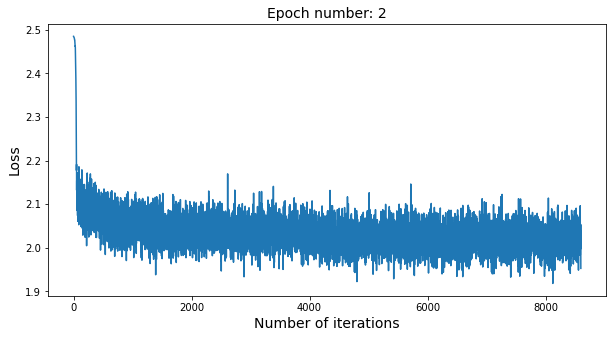

CPU times: user 3min 55s, sys: 9.77 s, total: 4min 5s
Wall time: 4min 15s


In [ ]:
%%time

loss_val = []

for epoch in range(2):
    
    # Train
    model.train()
    train_loader.dataset.ng_sample()

    for user, item, label in train_loader:
        user = user.to(DEVICE)
        item = item.to(DEVICE)
        label = label.float().to(DEVICE)

        model.zero_grad()
        prediction = model(user, item)
        loss = loss_function(prediction, label.long())
        loss.backward()
        optimizer.step()
        
        
        # Plot learning curve
        loss_val.append(loss.cpu().detach().numpy())
        
        if len(loss_val) % 100 != 0: continue
        
        clear_output(wait=True)
        plt.figure(figsize=(10, 5))
        plt.plot(loss_val)
        plt.xlabel("Number of iterations", size=14)
        plt.ylabel("Loss", size=14)
        plt.title("Epoch number: "+str(epoch+1), size=14)
        plt.show()

Словарь id2target потребуется дальше

In [ ]:
id2target = {11:torch.tensor([-1]), 0:torch.tensor([0]), 1: torch.tensor([1]), 2:torch.tensor([2]),
             3:torch.tensor([3]), 4:torch.tensor([4]), 5:torch.tensor([5]), 6:torch.tensor([6]), 7:torch.tensor([7]),
            8: torch.tensor([8]), 9:torch.tensor([9]), 10:torch.tensor([10])}

In [ ]:
def are_elements_equal(true, pred):
    result = []
    for i in range(len(true)):
        if true[i] == pred[i]:
            result.append(1)
        else:
            result.append(0)

    return result

In [ ]:
def predict(model, test_loader, top_k):
    top_10_list = []

    # i=0
    for user, item, label in test_loader:
        
        ### YOUR CODE HERE ####
        user = user.to(DEVICE)
        item = item.to(DEVICE)
        # print(user, item)
        # print(label)
        predictions = torch.argmax(model(user, item), dim=1) # предсказанные метки классов 
        pred_ratings = torch.tensor([]) # предсказанные классы
        for j in predictions:
            pred_ratings = torch.cat((pred_ratings, id2target[j.item()]), dim=0)
       
        _, indices = torch.topk(pred_ratings, top_k) # индексы 10ти наибольших элементов
        recommends = torch.take(item, indices).cpu().numpy().tolist() # аниме с наибольшими рейтингами
        items = item.cpu().numpy().tolist()[:top_k] # 10 аниме, которые посмотрел и положительно оценил пользователь
        
        top_10_list.append(are_elements_equal(items, recommends))

    return top_10_list

In [ ]:
model.eval()
top_10_list = predict(model, test_loader, top_k=10)
# top_10_list

In [ ]:
print('MAP', mean_average_precision(top_10_list)) # 10 true anime in test
print('MRR', mean_reciprocal_rank(top_10_list))
print('MEAN NDCG', np.mean([ndcg_at_k(i, 10) for i in top_10_list]))

MAP 0.02645394063059471
MRR 0.026780860650504383
MEAN NDCG 0.03632311840160367


In [ ]:
print('MAP', mean_average_precision(top_10_list)) # data leak
print('MRR', mean_reciprocal_rank(top_10_list))
print('MEAN NDCG', np.mean([ndcg_at_k(i, 10) for i in top_10_list]))

MAP 0.12942682067133018
MRR 0.13244588275090957
MEAN NDCG 0.1654874410107285


In [ ]:
print('MAP', mean_average_precision(top_10_list)) # 1 true anime in test
print('MRR', mean_reciprocal_rank(top_10_list))
print('MEAN NDCG', np.mean([ndcg_at_k(i, 10) for i in top_10_list]))

MAP 0.08180556523894737
MRR 0.08326684070949567
MEAN NDCG 0.11986329378645615


Этот вариант показал значения метрик:
* MAP 0.02645394063059471
* MRR 0.026780860650504383
* MEAN NDCG 0.03632311840160367<br>


В данном способе модель учится предсказывать не только рейтинг, который поставит пользователь, но и то, посмотрит ли он конкретное аниме вообще. В test_dataloader каждый батч относится к конкретному пользователю. 10 первых аниме в батче пользователь максимально положительно оценил, остальные 90 он не видел. Задачей модели в режиме eval() является правильно определить аниме, которые пользователь хорошо оценил и порекомендовать их. Аниме с высокой оценкой в train и test отличаются, таким образом модель не знает, какие аниме пользователь оценил в test.

In [ ]:
%%shell
jupyter nbconvert --to html /content/RS_Vakhrameev.ipynb

[NbConvertApp] Converting notebook /content/RS_Vakhrameev.ipynb to html
[NbConvertApp] Writing 739685 bytes to /content/RS_Vakhrameev.html
